# Overplotting SRS active region locations on a magnetograms

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/magnetogram_active_regions.html

How to find and plot the location of an active region on an HMI magnetogram.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sunpy.coordinates
import sunpy.data.sample
import sunpy.map
from sunpy.io.special import srs

For this example, we will start with the sample data. We need an HMI file and
use it to create a map, and the SRS table which contains a list of active
regions. Both of these data can be downloaded with ``Fido``.

In [ ]:
smap = sunpy.map.Map(sunpy.data.sample.HMI_LOS_IMAGE)
srs_table = srs.read_srs(sunpy.data.sample.SRS_TABLE)

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2011-06-07 06:32:11
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.01714 2.01714] arcsec / pix
Reference Pixel,[511.5 511.5] pix

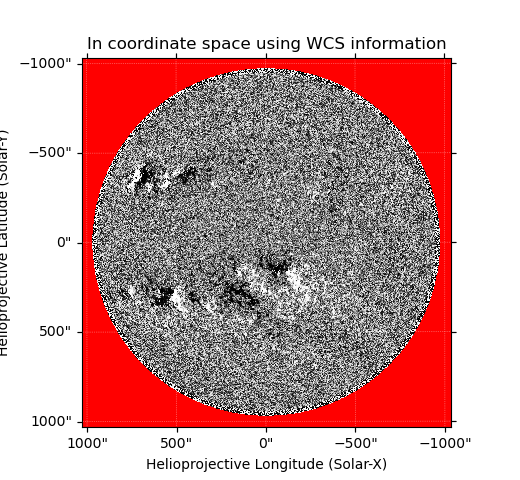
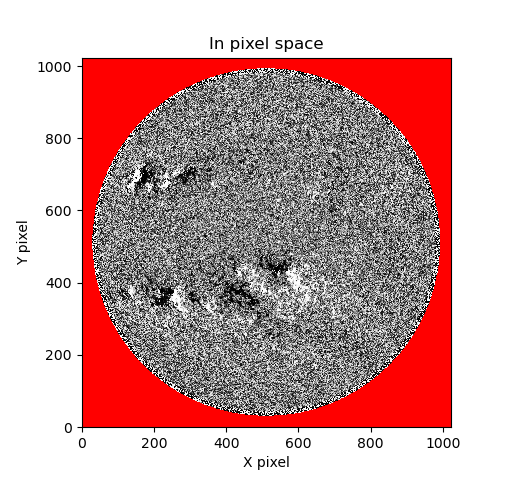
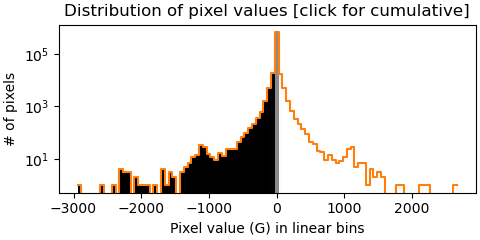
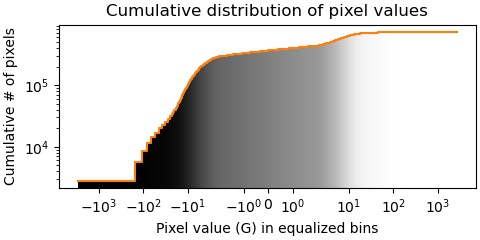

In [ ]:
smap

In [ ]:
srs_table

ID,Number,Carrington Longitude,Area,Z,Longitudinal Extent,Number of Sunspots,Mag Type,Latitude,Longitude
,,deg,uSH,,deg,,,deg,deg
str2,int64,float64,float64,str3,float64,int64,str5,float64,float64
I,11226,36.0,80.0,Dao,10.0,8,Beta,-22.0,52.0
I,11227,19.0,30.0,Hsx,2.0,1,Alpha,-21.0,35.0
I,11228,19.0,70.0,Cso,8.0,4,Beta,18.0,35.0
I,11232,337.0,40.0,Cso,4.0,3,Beta,8.0,-7.0
I,11233,27.0,0.0,Axx,1.0,1,Alpha,-18.0,43.0
IA,11225,61.0,———,--,———,--,--,17.0,77.0
IA,11229,47.0,———,--,———,--,--,18.0,63.0
IA,11230,6.0,———,--,———,--,--,20.0,22.0


We only need the rows which have 'ID' = 'I' or 'IA'.

In [ ]:
srs_table = srs_table[np.logical_or(srs_table['ID'] == 'I', srs_table['ID'] == 'IA')]
srs_table

ID,Number,Carrington Longitude,Area,Z,Longitudinal Extent,Number of Sunspots,Mag Type,Latitude,Longitude
,,deg,uSH,,deg,,,deg,deg
str2,int64,float64,float64,str3,float64,int64,str5,float64,float64
I,11226,36.0,80.0,Dao,10.0,8,Beta,-22.0,52.0
I,11227,19.0,30.0,Hsx,2.0,1,Alpha,-21.0,35.0
I,11228,19.0,70.0,Cso,8.0,4,Beta,18.0,35.0
I,11232,337.0,40.0,Cso,4.0,3,Beta,8.0,-7.0
I,11233,27.0,0.0,Axx,1.0,1,Alpha,-18.0,43.0
IA,11225,61.0,———,--,———,--,--,17.0,77.0
IA,11229,47.0,———,--,———,--,--,18.0,63.0
IA,11230,6.0,———,--,———,--,--,20.0,22.0


Now we extract the latitudes, longitudes and the region numbers.

In [ ]:
lats = srs_table['Latitude']
lngs = srs_table['Longitude']
numbers = srs_table['Number']

Let's plot the results by defining coordinates for each location.

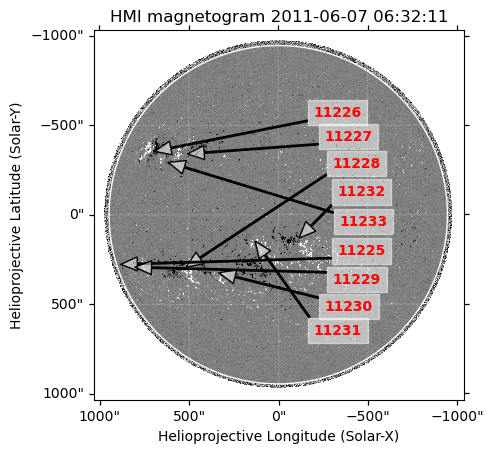

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)
# Passing vmin/vmax to ``plot`` does not work since
# a normalisation is set on the map. So we have to
# work around it like so:
smap.plot_settings["norm"].vmin = -150
smap.plot_settings["norm"].vmax = 150
smap.plot(axes=ax)
smap.draw_limb(axes=ax)

# Add a text box and arrow pointing to each active region
lat_text = -40
transparent_white = (1, 1, 1, 0.5)
for num, lng, lat in zip(numbers, lngs.value, lats.value):
    ax.annotate(num, (lng, lat),
                xytext=(320, lat_text),
                xycoords=ax.get_transform('heliographic_stonyhurst'),
                backgroundcolor=transparent_white,
                color='red',
                fontweight='bold',
                arrowprops=dict(facecolor=transparent_white, width=1, headwidth=10),
                horizontalalignment='right', verticalalignment='top')
    lat_text += 10

plt.show()